<div style="text-align: center;">
<h1>D207 Performance Assessment</h1>
    <H3><i>Which independent variables are most impactful to churn?</i></H3>
</div>
<hr>
<p><b>Tyson Biegler</b></p>
<p>Student ID: <b><i>012170282</b></i></p>
<p>D207 - Exploratory Data Analysis</p>
<p>Date: 07/--/2024</p>
<br>
<p>Western Governors University</p>
<p>School of Technology, College of IT</p>
<p>Master of Science, Data Analytics</p>




In [43]:
# Initial setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_columns = None #So that I can see all the columns
import statistics
from scipy import stats
import pylab as pl
import seaborn as sns

import plotnine as p9

In [2]:
# importing csv
df = pd.read_csv('C:/Users/tyson/Documents/GitHub/WGU_MSDA_Portfolio/Exploratory Data Analysis - D207/Raw/churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


# A Describing the situation
### A1. Research question
I want to discover <b style="color:magenta;">"which independant variables are most impactful to churn."</b>
### A2. Benefits of analysis
In the telecom industry, or any service industry for that matter, customers are the business. Customer service is essential to a thriving business.

The data dictionary mentions that some telecom companies can experience a 25% churn rate, and therefore, investigating the factors that contribute to customer churn is of utmost importance. If stakeholders knew precisely which factors contributed to churn, based on statistical analysis, they would have data-driven insights that would enable them to make meaningful changes for their customers. Some of these insights could lead to adjusting pricing, offering incentives based on tenure, increase training in customer interactions, focus more or less on different demographics and so on. 

### A3. Identification of the data
Because we will be investigating which factors impact customer churn, the dependant variable will be 'Churn.' 'Churn' is a categorical variable that consists of 'Yes' and 'No' values. I will convert Churn to a binary before proceding with statistical tests. 

Principal componant analysis determiens the amount of variance each variable contributes to each principal componant. its a dimentionality reduction technique that was used in the previoius course. Because there were specific variables that appeared prominant with high loadings in the principal componants, I have decided to inspect some of these variables further. Tenure and Bandwitdh_GB_year both had high loadings in princpal componant 1 (PC1), meaning that a large portion of the variance in PC1 came from these two variables. I will be conducting statistical tests on both of these in adition to MonthlyCharge. The survey responses 'Respectful' and 'Active_listening' are ordinal categorical data that consist of score ratings from one to eight (1 = most important, 8 = least important). I will be using these for bivariate analysis.  

In summary I will be using the following variables in my statistical tests:
<p><b>Quantitative variables</b></p>

- Tenure
- Bandwidth_GB_year, 
- MonthlyCharge

<p><b>Qualitative variables</b></p>

- Churn (Dependant Variable)
- Respectful
- Active_Listening

In [14]:
#renaming the survey responses to be more intuitive
df.rename(columns={'Item1':'Timely_response',
                   'Item2':'Timely_fixes',
                   'Item3':'Timely_replacements',
                   'Item4':'Reliability',
                   'Item5':'Options',
                   'Item6':'Respectful',
                   'Item7':'Courteous',
                   'Item8':'Active_listening'
                   },
          inplace=True)

df.columns[-8:] #making sure they were all changed correctly

Index(['Timely_response', 'Timely_fixes', 'Timely_replacements', 'Reliability',
       'Options', 'Respectful', 'Courteous', 'Active_listening'],
      dtype='object')

# B. Describe the analysis

### B1. Statstical test

In [4]:
#checking the unique values in Churn to make sure they are Yes and No
df['Churn'].unique()

#converting Churn to binary

df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})


In [5]:
monthly_charge_churned = df[df['Churn'] == 1]['MonthlyCharge']
monthly_charge_not_churned = df[df['Churn'] == 0]['MonthlyCharge']


In [41]:
# creating a random sample
sample_size = 370

monthly_charge_churned_sample = np.random.choice(monthly_charge_churned, size=sample_size, replace=False)
monthly_charge_not_churned_sample = np.random.choice(monthly_charge_not_churned, size=sample_size, replace=False)

pearson = stats.pearsonr(monthly_charge_churned_sample, monthly_charge_not_churned_sample)
print(pearson)

PearsonRResult(statistic=0.005263489929520932, pvalue=0.9196271666849555)


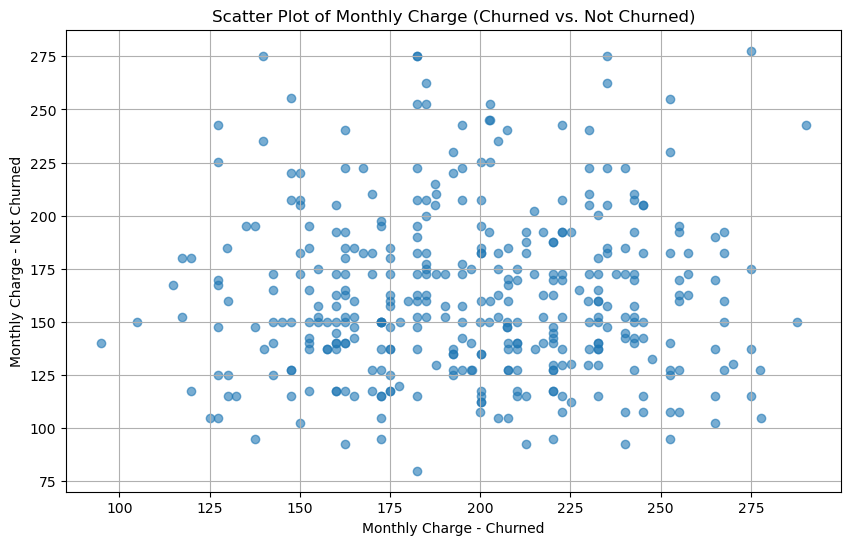

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(monthly_charge_churned_sample, monthly_charge_not_churned_sample, alpha=0.6)
plt.title('Scatter Plot of Monthly Charge (Churned vs. Not Churned)')
plt.xlabel('Monthly Charge - Churned')
plt.ylabel('Monthly Charge - Not Churned')
plt.grid(True)
plt.show()

In [6]:
N1 = len(monthly_charge_churned) 
N2 = len(monthly_charge_not_churned) 

mean_churned = statistics.mean(monthly_charge_churned)
mean_not_churned = statistics.mean(monthly_charge_not_churned)
var_churned = statistics.variance(monthly_charge_churned)
var_not_churned = statistics.variance(monthly_charge_not_churned)

# Calculate the standard deviation of the variance
s = np.sqrt((var_churned + var_not_churned) / 2)

print('The mean of churned is: ', mean_churned)
print('The mean of not churned is: ', mean_not_churned)

# Calculate the t statistic
t = (mean_churned - mean_not_churned) / (s * np.sqrt(2 / (N1 + N2)))

# Degrees of freedom
degrees_freedom  = N1 + N2 - 2

# p-value after comparison with the t-distribution
p = 2 * (1 - stats.t.cdf(abs(t), df=degrees_freedom ))


print(str(N1) + " customers have churned")
print(str(N2) + " customers have not churned")
print("t = " + str(t))
print("p = " + str(p))
if(p<.05):
    print("Reject the null hypothesis. There is a statistically significant difference")



The mean of churned is:  199.29517509886793
The mean of not churned is:  163.00897252612245
2650 customers have churned
7350 customers have not churned
t = 63.65711597680452
p = 0.0
Reject the null hypothesis. There is a statistically significant difference


C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\tyson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


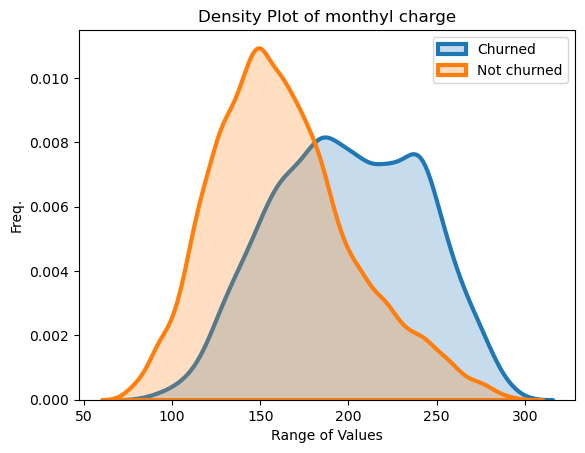

In [7]:
# Density plot in Python
a=monthly_charge_churned
b=monthly_charge_not_churned

#seaborn histogram
sns.kdeplot(a, fill=True, linewidth=3, label='a')
sns.kdeplot(b, fill=True, linewidth=3, label='b')

#add labels
plt.title('Density Plot of monthyl charge')
plt.xlabel('Range of Values')
plt.ylabel('Freq.')

#add legend
plt.legend(['Churned', 'Not churned'])

### B2. Output of analysis

<p>There are 2650 churned customers and their mean monthly charge is \$199.30 where as the 7350 customers who have not churned have a mean monthly charge of $163.01. The t-test indicates that there is a statistically significant difference in monthly charges between the two groups and therefore I will reject the null hypothesis that the means of the two grops are the same. </p>

<p>As displayed in the density plot above, the not churned customers monthly charge seems to peek at \$150 and then we see a drastic decline in frequency of unchurned customers. Similarly, the churned customers have their peek around \$200. Unchurned customers appear to be more closely grouped around the mean (\$163.01) where as the churned customers appear to have a wider range of monnthly charges.</p>

<p>
Although there is a statistically significant difference in reguards to monthly charges for customers who churn and customers who do not, this does not imply that monthly charge is the cause of churn. After running a random sample through a perason correlation, it appears that there is not a correlation between the two groups. The pearson correlation coefficient is 0.0052 indicating that there is no linear relationship between the two groups. Likewise the p-value of 0.9196 suggests that we fail to reject the null hypothesis that there is a correlation. Therefore, although there is a statistical difference between the monthly charges of churned and not churned customers, monthly charge does not appear to be the cause. 
</p>


### B3. Justification of techniques

A t-test is most appropriate for this data because monthly charge is a continuous numeric variable with only 2 groups being 'churned' and 'not churned.'  

# C. Univariate statistics

<p>
    The two continuous variables are <b>Tenure</b> and <b>Bandwidth_GB_Year</b>. Both have a bimodal distribution. Tenure has a mean tenure of 34.53 and Bandwidth_GB_Year has a mean GB useage of 3392.34 GB per year. 
</p>

<p> 
    The two categorical varibales are <b>Respectful</b> and <b>Active_listening</b>, both of which are one of the renamed survey response variables.
    Respectful has a mean of 3.497 meaning that customers highly value respectulness. Similarly, Active listening was rated with a mean of 3.495 ranking it slightly lower in importance according to the customer survey. Both of these categorical variables appear to have a bimodal distribution. 
    </p>


In [8]:
df[['Tenure','Bandwidth_GB_Year', 'Respectful', 'Active_listening']].describe()

,Tenure,Bandwidth_GB_Year,Respectful,Active_listening
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.526188,3392.341550,3.497300,3.495600
std,26.443063,2185.294852,1.033586,1.028633
min,1.000259,155.506715,1.000000,1.000000
25%,7.917694,1236.470827,3.000000,3.000000
50%,35.430507,3279.536903,3.000000,3.000000
75%,61.479795,5586.141370,4.000000,4.000000
max,71.999280,7158.981530,8.000000,8.000000


### C1. Visual representation of findings

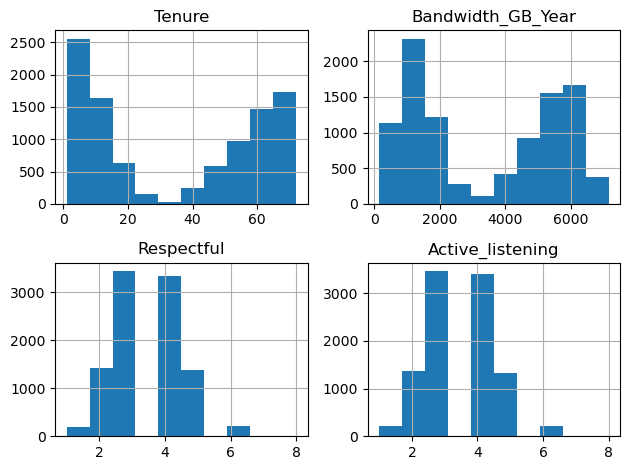

In [9]:
df[['Tenure','Bandwidth_GB_Year',  'Respectful', 'Active_listening']].hist()

plt.tight_layout()

# D. Bivariate statistics

<p>
   As noted below, the pearson correlation coefficient of 0.308 suggests that there is a weak but positive correlation between 'Respectful' and 'Active_listening'. This means that when one increases so does the other but not in a perfect linear fashion due to the weak correlation. The Pvalue of 7.42599212180769e-219 indicates that the p value is essentially 0 and therefore we should reject the null hypotheses that there is no correlation. In otherwords though this correlation is weak, it is highly unlikely due to randome change. 
</p>
<p>
    In contrast Tenure, and Bandwidth_GB_Year have a pearson coorelation coefficient of 0.991 indicating a very strong positve correlation between the two. Likewise, when customer Tenure increases so does the custoemrs anual GB usage. The Pvalue of 0 would also indicate that this correlation is not due to random chance and would suggest that we once again, reject the null hypothesis that here is not a correlation between the two variables. 
</p>


### D1. Visual representation of findings

In [10]:
pearson2 = stats.pearsonr(df.Respectful, df.Active_listening)
print(pearson2)

PearsonRResult(statistic=0.30810460310443, pvalue=7.42599212180769e-219)


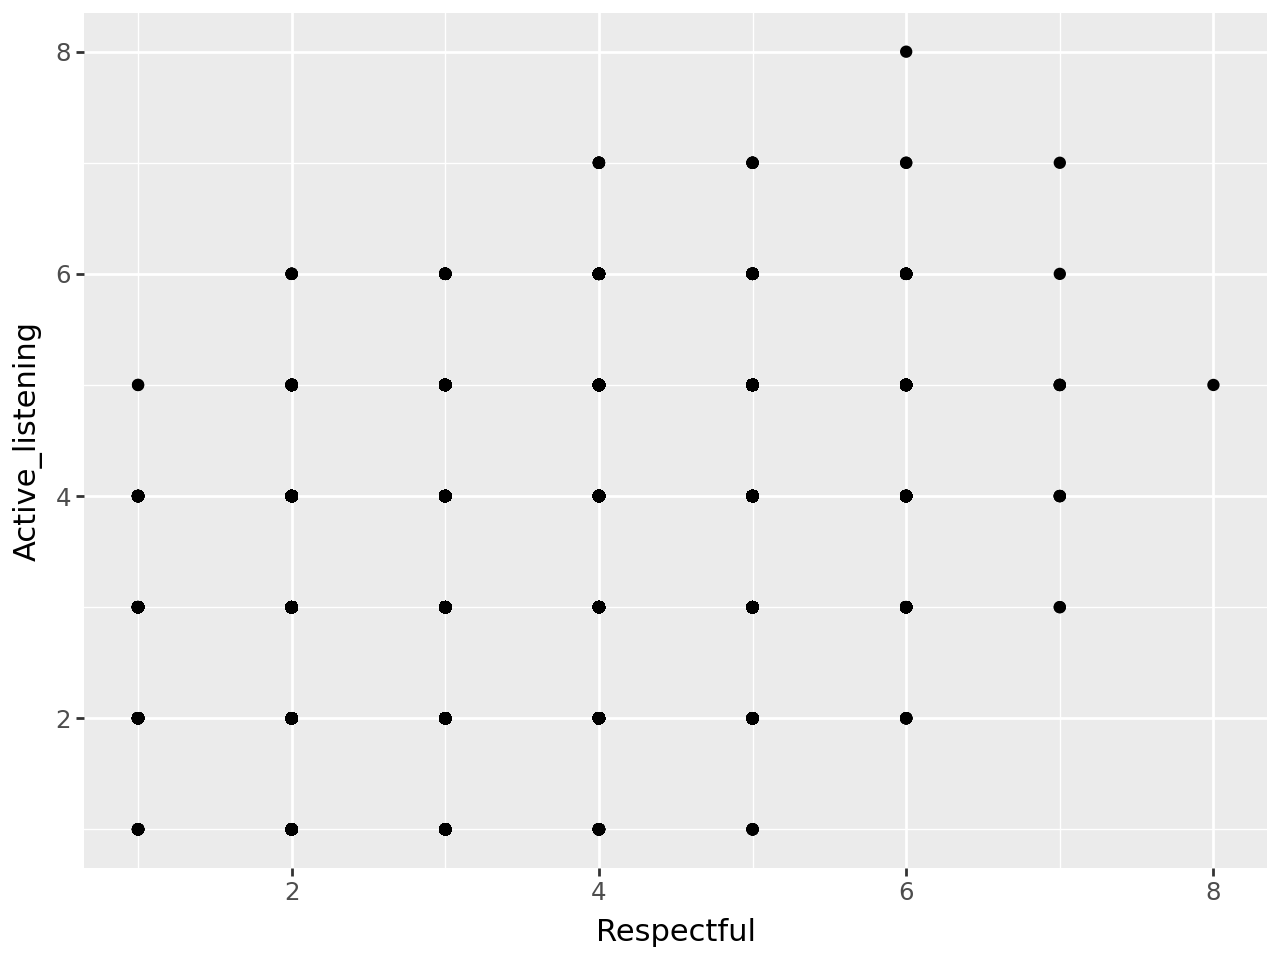

In [11]:
(p9.ggplot(df)+ p9.aes(x='Respectful', y='Active_listening')+ p9.geom_point())

In [12]:
pearson3 = stats.pearsonr(df.Tenure, df.Bandwidth_GB_Year)
print(pearson3)

PearsonRResult(statistic=0.9914951921640127, pvalue=0.0)


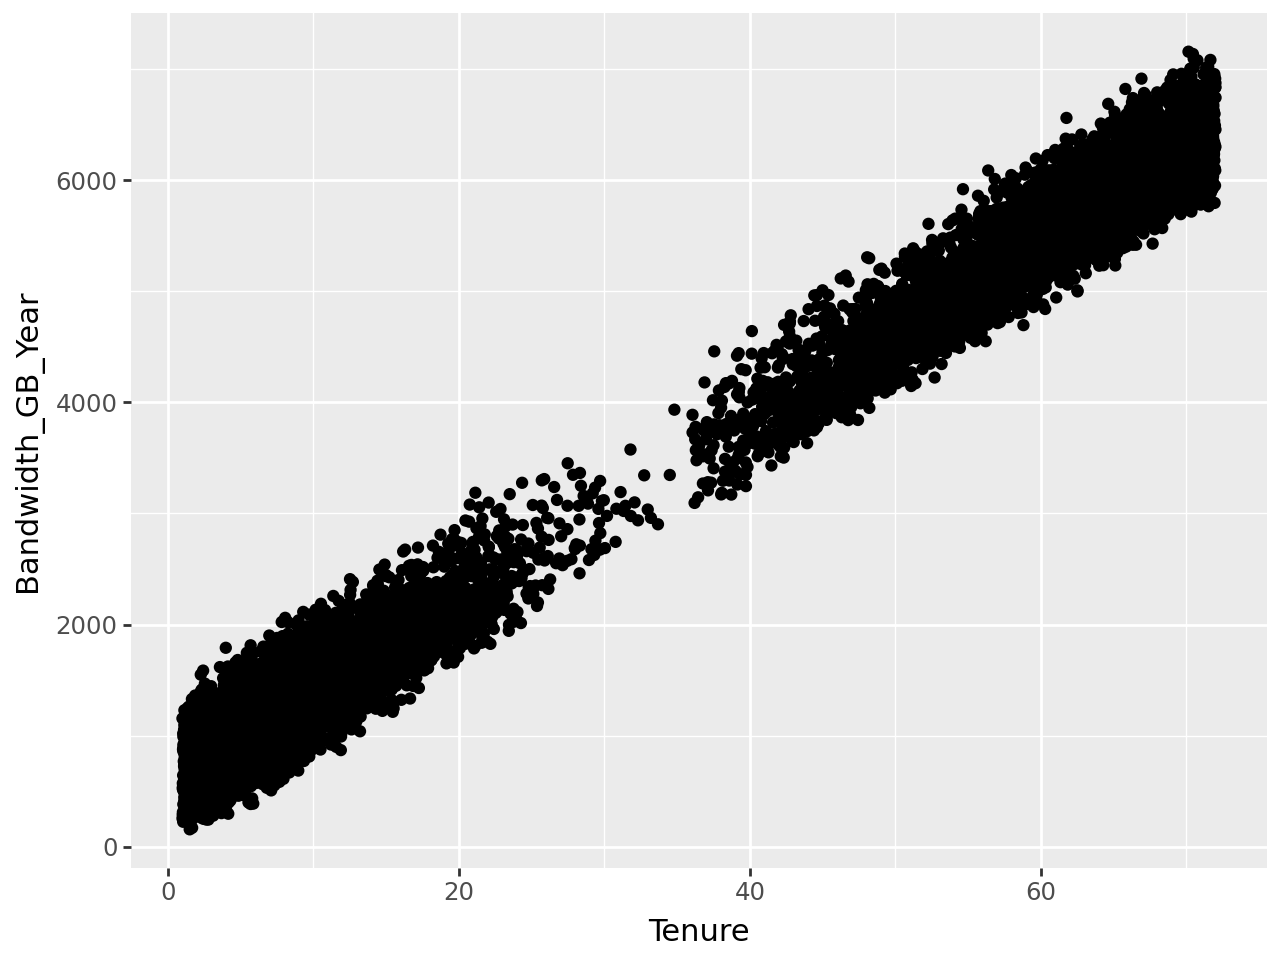

In [13]:
(p9.ggplot(df)+ p9.aes(x='Tenure', y='Bandwidth_GB_Year')+ p9.geom_point())

# E. Summary of implications

### E1. Results of the hypotheses test
<p> The t-test on monthly charge indicated that there is a statistically significant difference between customers who have churned and customers who have not. Therefore, I will reject the null hypothesis that there is not difference between the monthly charges between the groups.</p>

<p>
    The univariate statistics displayed a visually similar chart between Respectful and Active_listening. However the correlation appeared to be weak.
   The bivariate statistics showed no significant correlations other than with Tenure and Bandwidth_GB_Year. So as customer Tenure increases, so to does their bandwidth per year in GB.   
</p>

### E2. Limitations of this analysis
<p>The survey responses measure the customer's ranking of importance of certain factors rather than their experience with customer service. Becuase of this the relationships between survery responses and churn are not indicitive of a problem that can be addressed. For example, if a customer ranks 'Active_listening' as a 1 (most important) and then the customer churns, this does not indicate that the customer did not experience active listening and therefor churned.  The survey responses might be more insigtful if they represented the customer's experience of these factors while communicating with the representatives from the company. If customers churned based on recent interactions then we could make suggestions in terms of implimenting training or coaching stratagies to improve these customer interactions.</p>

### E3. Recomendations based on results
<p style="color:magenta;"> --- ENTER RECOMENDATIONS HERE --- </p>

# F Panopto video
The panapto video link is provided in the uploaded documents.

# G. Web sources for third party code

- Datacamp Performing experiments in python, testing proportion and correlation @3:16 
    https://campus.datacamp.com/courses/performing-experiments-in-python/the-basics-of-statistical-hypothesis-testing?ex=9
- calculator.net sample size calculator
    https://www.calculator.net/sample-size-calculator.html?type=1&cl=95&ci=5&pp=50&ps=10000&x=Calculate

# H. Other sources

<h2>Tests to use</h2><b>source<b>: 
<a href="https://www.youtube.com/watch?v=I10q6fjPxJ0">Greg Martin</a>


|             | **Test**    | **H0**    | **H1**    | **p value**    | **Result**    |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| **One Categorical** | 1 sample proportion test | H0 no difference | H1 there is a difference | p < .05 alpha value, reject H0 | difference is stat. significant |
| **Two Categorical** | chi squared | M/F independant of Age | M/F dependant on Age | p < .05 alpha value, reject H0| observation is stat. significant |
| **One Numeric** | t-test | avg. height not different | avg height diff. from historic height  | p < .05 alpha value, reject H0| difference is stat. significant |
| **One Numeric and One Categorical** | t-test or ANOVA | M/F no diffrence in height | M/F difference in height | p < .05 alpha value, reject H0| difference is stat. significant |
| **Two Numeric** | correlation test | no difference between weight and height | there is a relationship between weight and height | p < .05 alpha value, reject H0| difference is stat. significant |



<hr>

In [ ]:
# Exporting to CSV
df.to_csv('C:/Users/tyson/Documents/GitHub/WGU_MSDA_Portfolio/Exploratory Data Analysis - D207/Cleaned/D207PA.csv', index=False)